# Exploratory data analysis : Gender

### Chargement des packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Chargement des fichiers csv dans des dataframes

In [3]:
path = "/Users/galinette/Desktop/3A/ENSAE/olympic-games/"
dic = path + "dictionary.csv"
summer = path + "summer.csv"
winter = path + "winter.csv"

In [4]:
df_dic = pd.read_csv(dic)
df_summer = pd.read_csv(summer)
df_winter = pd.read_csv(winter)

### Quelques valeurs manquantes pour le PIB et la Population

In [5]:
df_dic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
Country           201 non-null object
Code              201 non-null object
Population        196 non-null float64
GDP per Capita    176 non-null float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


### Aucune valeur manquantes pour l'été

In [6]:
df_summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [7]:
df_winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
Year          5770 non-null int64
City          5770 non-null object
Sport         5770 non-null object
Discipline    5770 non-null object
Athlete       5770 non-null object
Country       5770 non-null object
Gender        5770 non-null object
Event         5770 non-null object
Medal         5770 non-null object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


### Combien d'année de JO ...

### ... d'été'

In [8]:
print(len(set(df_summer["Year"])))

l1 = list(set(df_summer["Year"]))
l1.sort()
l2 = list(range(1896, 2014, 4))
l2.remove(1916)
l2.remove(1940)
l2.remove(1944)

for i in range(len(l2)):
    
    if i == 0:
        print(l2[i])
    
    elif i == 9:
        print(l2[i])
    
    elif i == 18:
        print(l2[i])
    
    
    elif i == 26:
        print(l2[i])

print("\nTaille de chaque sous-groupe : 9")

27
1896
1936
1980
2012

Taille de chaque sous-groupe : 9


### ... d'hiver

In [9]:
print(len(set(df_winter["Year"])))

l1 = list(set(df_winter["Year"]))
l1.sort()
l2 = list(range(1924, 2018, 4))
#l2.remove(1916)
l2.remove(1940)
l2.remove(1944)

for i in range(len(l1)):
    
    print(l1[i], " ", l2[i])
    
    """"
    if i == 0:
        print(l2[i])
    
    elif i == 9:
        print(l2[i])
    
    elif i == 18:
        print(l2[i])
    
    
    elif i == 26:
        print(l2[i])
    """
print("\nTaille de chaque sous-groupe : ")
print((1936-1924)/4 + 1)
print((1980-1948)/4 + 1)
print((2016-1984)/4 + 1)

22
1924   1924
1928   1928
1932   1932
1936   1936
1948   1948
1952   1952
1956   1956
1960   1960
1964   1964
1968   1968
1972   1972
1976   1976
1980   1980
1984   1984
1988   1988
1992   1992
1994   1996
1998   2000
2002   2004
2006   2008
2010   2012
2014   2016

Taille de chaque sous-groupe : 
4.0
9.0
9.0


### Combien de pays vainqueurs

In [10]:
print("En été : ", len(set(df_summer["Country"])))
print ("En hiver : ", len(set(df_winter["Country"])))

En été :  148
En hiver :  45


# JO D'ÉTÉ

### Evolution du nombre d'hommes et de femmes medailles au JO d'été (equivalent au nombre de sport dans lesquels les hommes et les femmes peuvent participer)

In [11]:
df_summer["Gender"].value_counts()

Men      22746
Women     8419
Name: Gender, dtype: int64

In [12]:
df_summer_gold = df_summer.loc[df_summer["Medal"] == "Gold", :]
print("Gold : ", len(df_summer_gold), 3*len(df_summer_gold))
print("All : ", len(df_summer))

Gold :  10486 31458
All :  31165


In [13]:
df_gender_evolution = pd.crosstab(df_summer_gold["Year"], df_summer_gold["Gender"])
df_gd_evol = pd.DataFrame({"Men": df_gender_evolution["Men"], "Women": df_gender_evolution["Women"], "Year": df_gender_evolution.index})

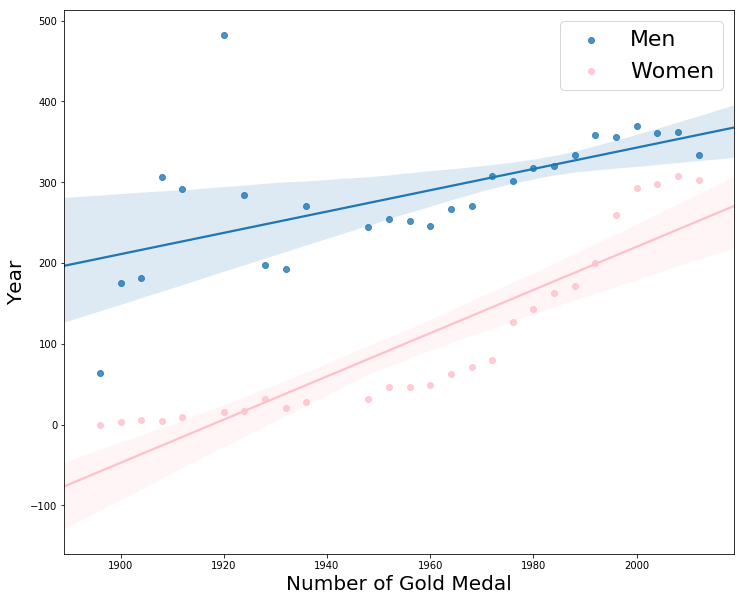

In [14]:
fig, ax = plt.subplots(figsize = (12, 10))
sns.regplot(x="Year", y="Men", data=df_gd_evol, label="Men", ax=ax)
sns.regplot(x="Year", y="Women", data=df_gd_evol, label="Women", ax=ax, color = "pink")
ax.set_xlabel("Number of Gold Medal",fontsize=20)
ax.set_ylabel("Year",fontsize=20)
ax.legend(loc="best", fontsize='22')

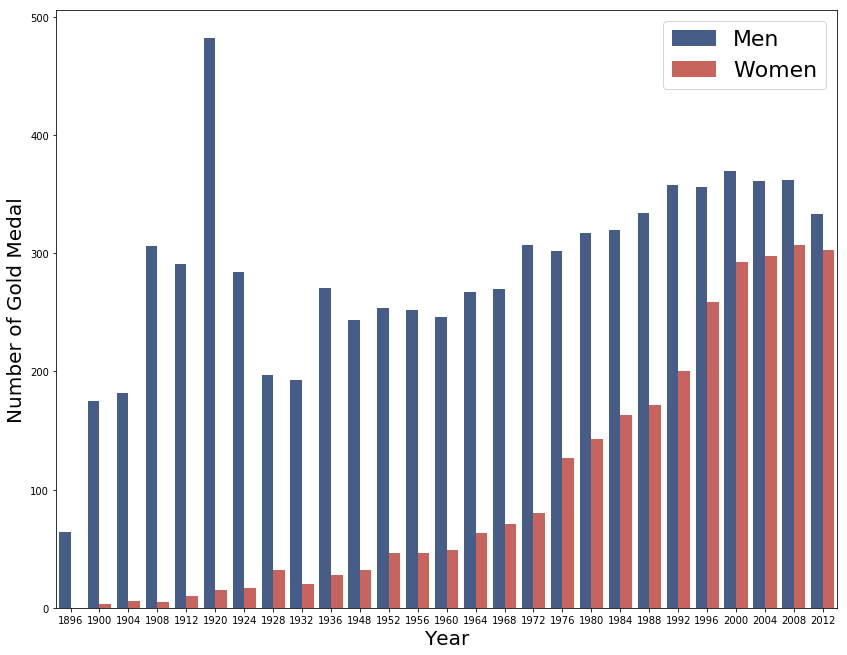

In [15]:
fig, ax = plt.subplots(figsize = (14, 11))
g = sns.countplot(x="Year", hue="Gender", data=df_summer_gold, palette={"Men":sns.xkcd_rgb['denim blue'], "Women":sns.xkcd_rgb['pale red']})
ax.set_xlabel("Year",fontsize=20)
ax.set_ylabel("Number of Gold Medal",fontsize=20)
ax.legend(loc="best", fontsize='22')

### Lien entre les genres et les pays ...

### ... Avant 1937

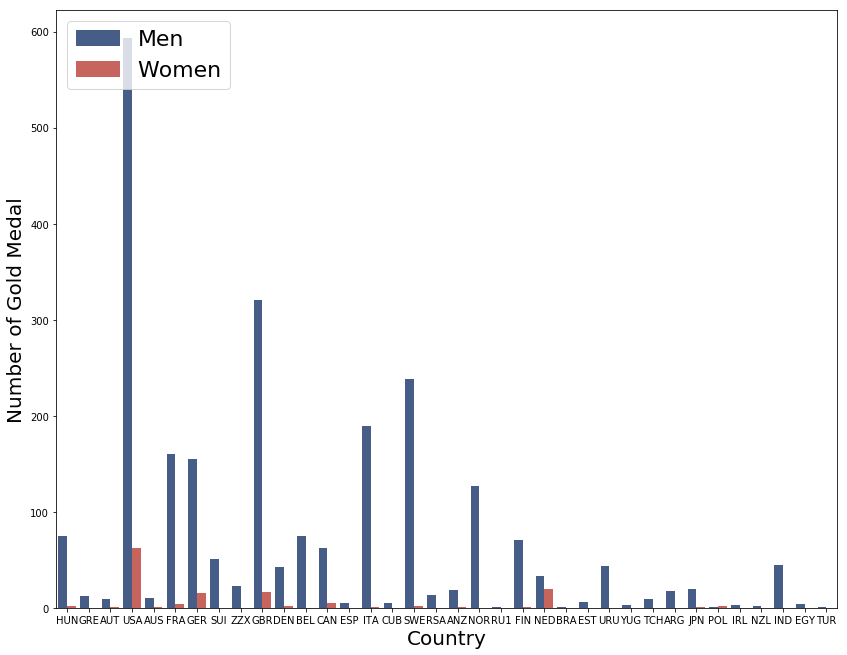

In [17]:
df_early_years = df_summer_gold[df_summer_gold["Year"] < 1937]

fig, ax = plt.subplots(figsize = (14, 11))
g = sns.countplot(x="Country", hue="Gender", data=df_early_years, palette={"Men":sns.xkcd_rgb['denim blue'], "Women":sns.xkcd_rgb['pale red']})
ax.set_xlabel("Country",fontsize=20)
ax.set_ylabel("Number of Gold Medal",fontsize=20)
ax.legend(loc="best", fontsize='22')

In [20]:
df_gender_summer_country_early = pd.crosstab(df_early_years["Country"], df_early_years["Gender"])

country_without_women_victory = 0
country_without_men_victory = 0
nb_de_pays = len(df_gender_summer_country_early["Men"])
                 
for i in range(nb_de_pays):
    if df_gender_summer_country_early["Men"][i] == 0:
        country_without_men_victory += 1
    if df_gender_summer_country_early["Women"][i] == 0:
        country_without_women_victory += 1
        
print("Sans femmes : ", country_without_women_victory, "Pourcentage : ", country_without_women_victory/nb_de_pays)
print("Sans hommes : ", country_without_men_victory, "Pourcentage : ", country_without_men_victory/nb_de_pays)

Sans femmes :  20 Pourcentage :  0.5555555555555556
Sans hommes :  0 Pourcentage :  0.0


### ... Entre 1937 et 1985

In [19]:
df_mid_years = df_summer_gold[(df_summer_gold["Year"] > 1937) & (df_summer_gold["Year"] < 1985)]

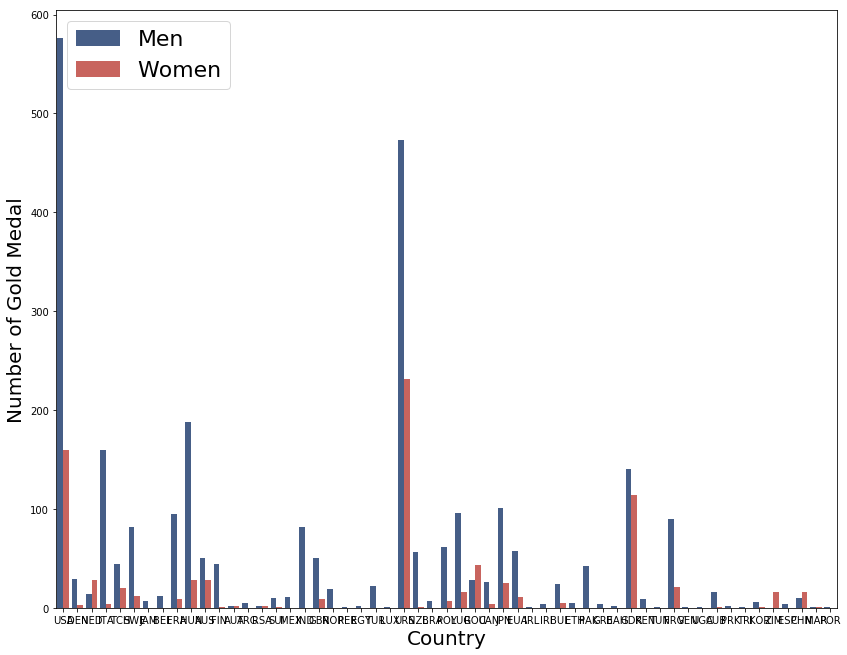

In [68]:
fig, ax = plt.subplots(figsize = (14, 11))
g = sns.countplot(x="Country", hue="Gender", data=df_mid_years, palette={"Men":sns.xkcd_rgb['denim blue'], "Women":sns.xkcd_rgb['pale red']})
ax.set_xlabel("Country",fontsize=20)
ax.set_ylabel("Number of Gold Medal",fontsize=20)
ax.legend(loc="best", fontsize='22')

### ... Après 1985

In [22]:
df_recent_years = df_summer_gold[(df_summer_gold["Year"] > 1985)]

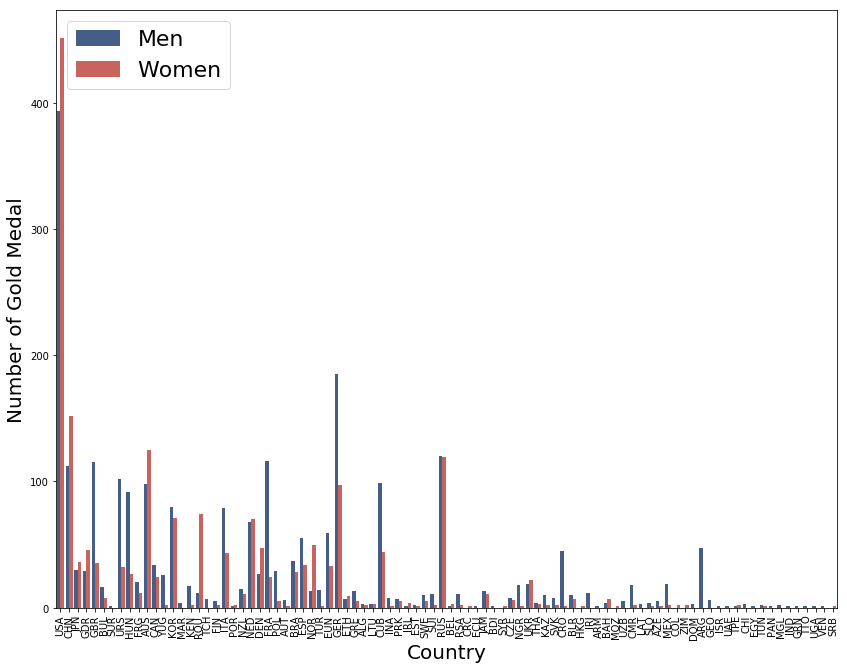

In [30]:
fig, ax = plt.subplots(figsize = (14, 11))
g = sns.countplot(x="Country", hue="Gender", data=df_recent_years, palette={"Men":sns.xkcd_rgb['denim blue'], "Women":sns.xkcd_rgb['pale red']})
ax.set_xlabel("Country",fontsize=20)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
ax.set_ylabel("Number of Gold Medal",fontsize=20)
ax.legend(loc="best", fontsize='22')

# TO DO : Last Year

# JO D'HIVER

### Evolution du nombre d'hommes et de femmes medailles au JO d'hiver (equivalent au nombre de sport dans lesquels les hommes et les femmes peuvent participer)

In [16]:
df_winter_gold = df_winter.loc[df_winter["Medal"] == "Gold", :]
print("Gold : ", len(df_winter_gold), 3*len(df_winter_gold))
print("All : ", len(df_winter))

Gold :  1921 5763
All :  5770


In [17]:
df_gender_winter_evolution = pd.crosstab(df_winter_gold["Year"], df_winter_gold["Gender"])
df_gd_evol_winter = pd.DataFrame({"Men": df_gender_winter_evolution["Men"], "Women": df_gender_winter_evolution["Women"], "Year": df_gender_winter_evolution.index})

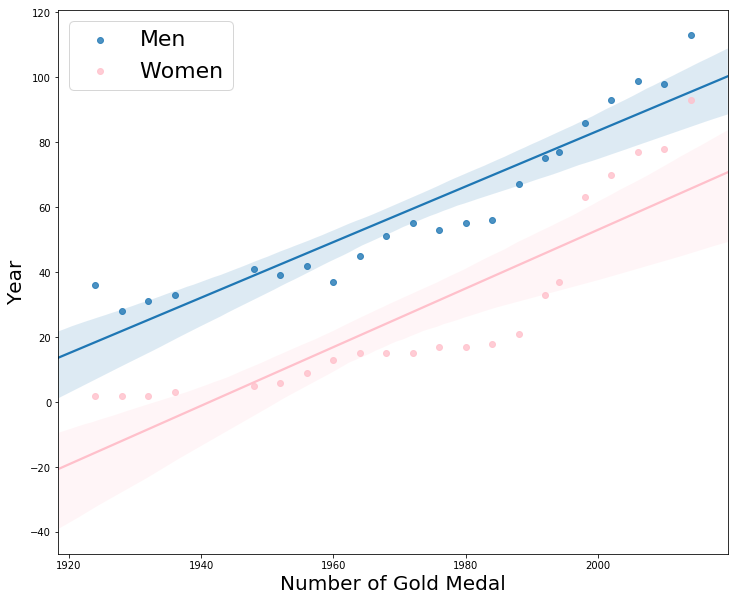

In [18]:
fig, ax = plt.subplots(figsize = (12, 10))
sns.regplot(x="Year", y="Men", data=df_gd_evol_winter, label="Men", ax=ax)
sns.regplot(x="Year", y="Women", data=df_gd_evol_winter, label="Women", ax=ax, color = "pink")
ax.set_xlabel("Number of Gold Medal",fontsize=20)
ax.set_ylabel("Year",fontsize=20)
ax.legend(loc="best", fontsize='22')

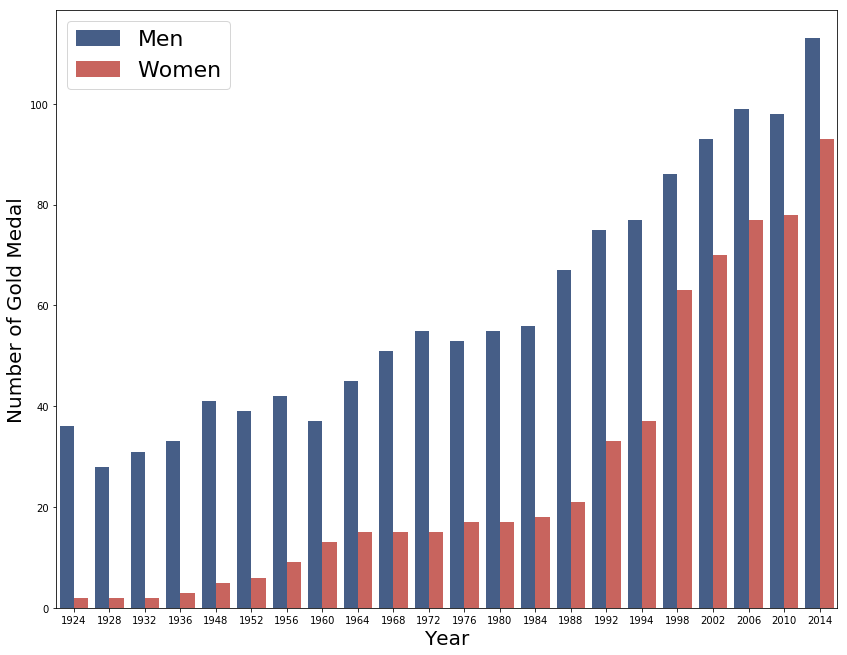

In [19]:
fig, ax = plt.subplots(figsize = (14, 11))
g = sns.countplot(x="Year", hue="Gender", data=df_winter_gold, palette={"Men":sns.xkcd_rgb['denim blue'], "Women":sns.xkcd_rgb['pale red']})
ax.set_xlabel("Year",fontsize=20)
ax.set_ylabel("Number of Gold Medal",fontsize=20)
ax.legend(loc="best", fontsize='22')

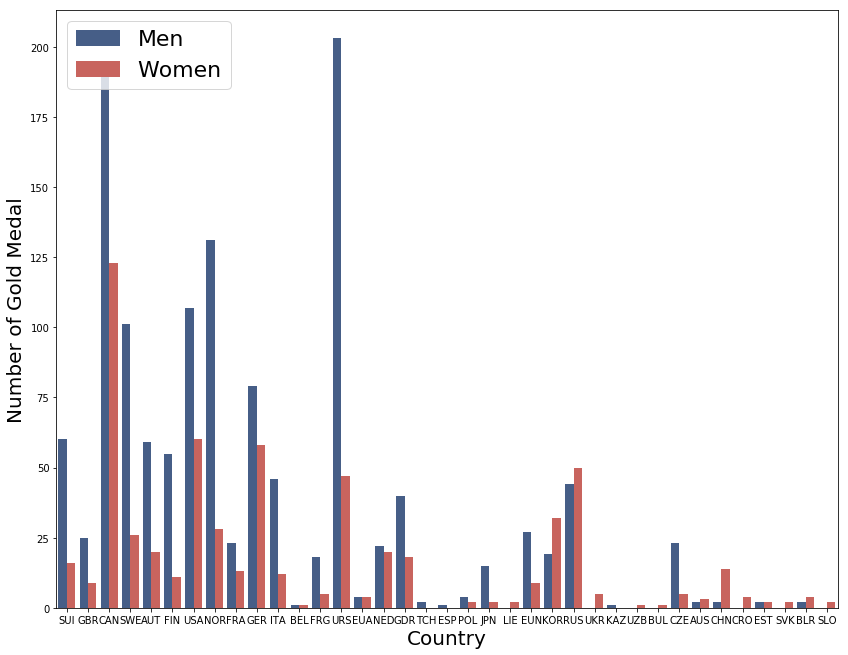

In [20]:
fig, ax = plt.subplots(figsize = (14, 11))
g = sns.countplot(x="Country", hue="Gender", data=df_winter_gold, palette={"Men":sns.xkcd_rgb['denim blue'], "Women":sns.xkcd_rgb['pale red']})
ax.set_xlabel("Country",fontsize=20)
ax.set_ylabel("Number of Gold Medal",fontsize=20)
ax.legend(loc="best", fontsize='22')

In [28]:
df_early_years = df_winter_gold[df_winter_gold["Year"] < 1937]

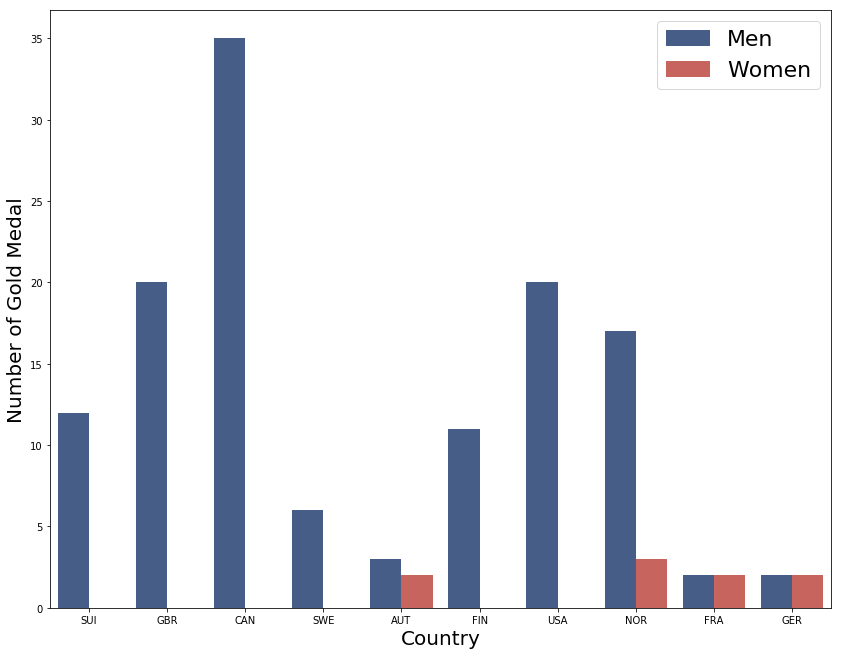

In [32]:
fig, ax = plt.subplots(figsize = (14, 11))
g = sns.countplot(x="Country", hue="Gender", data=df_early_years, palette={"Men":sns.xkcd_rgb['denim blue'], "Women":sns.xkcd_rgb['pale red']})
ax.set_xlabel("Country",fontsize=20)
ax.set_ylabel("Number of Gold Medal",fontsize=20)
ax.legend(loc="best", fontsize='22')

In [43]:
df_gender_winter_country_early = pd.crosstab(df_early_years["Country"], df_early_years["Gender"])

country_without_women_victory = 0
country_without_men_victory = 0
nb_de_pays = len(df_gender_winter_country_early["Men"])
                 
for i in range(nb_de_pays):
    if df_gender_winter_country_early["Men"][i] == 0:
        country_without_men_victory += 1
    if df_gender_winter_country_early["Women"][i] == 0:
        country_without_women_victory += 1
        
print("Sans femmes : ", country_without_women_victory, "Pourcentage : ", country_without_women_victory/nb_de_pays)
print("Sans hommes : ", country_without_men_victory, "Pourcentage : ", country_without_men_victory/nb_de_pays)

Sans femmes :  6 Pourcentage :  0.6
Sans hommes :  0 Pourcentage :  0.0


In [31]:
df_mid_years = df_winter_gold[(df_winter_gold["Year"] > 1937) & (df_winter_gold["Year"] < 1985)]

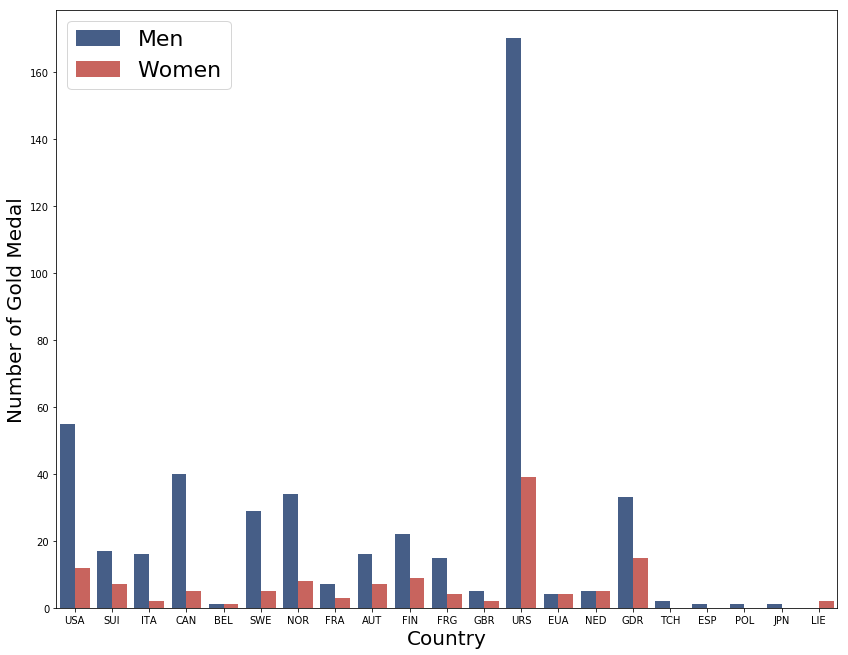

In [33]:
fig, ax = plt.subplots(figsize = (14, 11))
g = sns.countplot(x="Country", hue="Gender", data=df_mid_years, palette={"Men":sns.xkcd_rgb['denim blue'], "Women":sns.xkcd_rgb['pale red']})
ax.set_xlabel("Country",fontsize=20)
ax.set_ylabel("Number of Gold Medal",fontsize=20)
ax.legend(loc="best", fontsize='22')

In [44]:
df_gender_winter_country_mid = pd.crosstab(df_mid_years["Country"], df_mid_years["Gender"])

country_without_women_victory = 0
country_without_men_victory = 0
nb_de_pays = len(df_gender_winter_country_mid["Men"])
                 
for i in range(nb_de_pays):
    if df_gender_winter_country_mid["Men"][i] == 0:
        country_without_men_victory += 1
    if df_gender_winter_country_mid["Women"][i] == 0:
        country_without_women_victory += 1
        
print("Sans femmes : ", country_without_women_victory, "Pourcentage : ", country_without_women_victory/nb_de_pays)
print("Sans hommes : ", country_without_men_victory, "Pourcentage : ", country_without_men_victory/nb_de_pays)

Sans femmes :  4 Pourcentage :  0.19047619047619047
Sans hommes :  1 Pourcentage :  0.047619047619047616


In [34]:
df_recent_years = df_winter_gold[(df_winter_gold["Year"] > 1985)]

### Intéressant de voir que pour certains pays entre 1984 et 2014 il y a eu plus de médailles d'or gagnées par des femmes que par des hommes (USA, CANADA, COREE, RUSSIE, CHINE, UKRAINE, SLOVENIE, SLOVAQUIE, BIELORUSSIE)

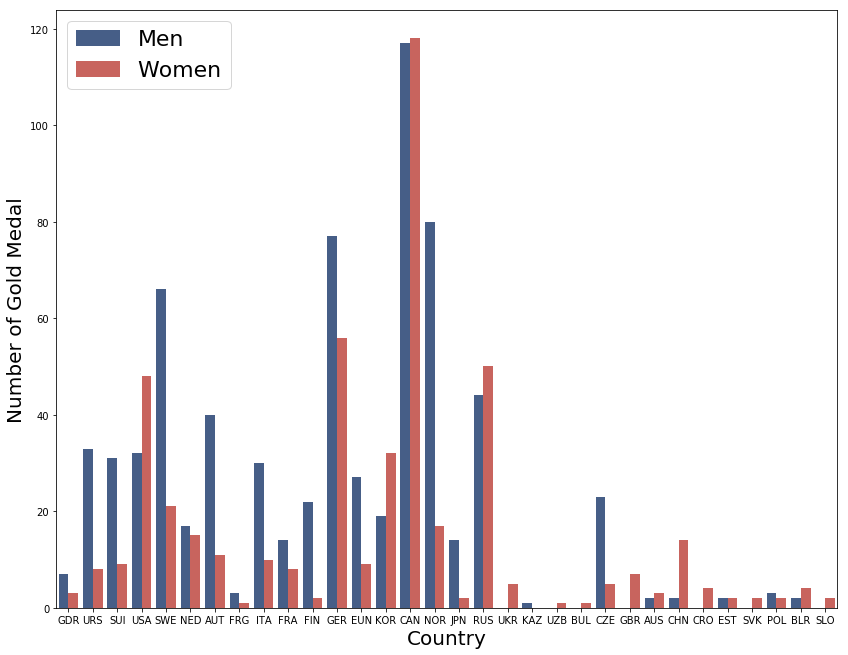

In [35]:
fig, ax = plt.subplots(figsize = (14, 11))
g = sns.countplot(x="Country", hue="Gender", data=df_recent_years, palette={"Men":sns.xkcd_rgb['denim blue'], "Women":sns.xkcd_rgb['pale red']})
ax.set_xlabel("Country",fontsize=20)
ax.set_ylabel("Number of Gold Medal",fontsize=20)
ax.legend(loc="best", fontsize='22')

### à partir de 1984 : Plus de pays où les hommes n'ont gagné aucune médailles d'or que de pays où les femmes n'ont gagné aucune médaille d'or

In [47]:
df_gender_winter_country_recent = pd.crosstab(df_recent_years["Country"], df_recent_years["Gender"])

country_without_women_victory = 0
country_without_men_victory = 0
nb_de_pays = len(df_gender_winter_country["Men"])

for i in range(nb_de_pays):
    if df_gender_winter_country["Men"][i] == 0:
        country_without_men_victory += 1
    if df_gender_winter_country["Women"][i] == 0:
        country_without_women_victory += 1
        
print("Sans femmes : ", country_without_women_victory, "Pourcentage : ", country_without_women_victory/nb_de_pays)
print("Sans hommes : ", country_without_men_victory, "Pourcentage : ", country_without_men_victory/nb_de_pays)

Sans femmes :  1 Pourcentage :  0.03125
Sans hommes :  7 Pourcentage :  0.21875
